<a href="https://colab.research.google.com/github/10944110/AI-Development/blob/main/itanic_3_explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

### Subtask:

readdata from CSV


**Reasoning**:
I need to import the pandas library and load the "tested.csv" dataset into a pandas DataFrame named `df`, then display its first 5 rows and shape.



In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
file_path = '/content/tested.csv'
import pandas as pd

try:
    #df = pd.read_csv('tested.csv')
    df = pd.read_csv(file_path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'tested.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 12)


## Data exploration

### Subtask:
Explore the loaded Titanic dataset to understand its characteristics.


**Reasoning**:
Analyze the data by checking data types, missing values, target variable distribution, and numerical feature statistics, then visualize the target variable distribution.



Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

DataFrame Shape: (418, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing Value Percentage:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Survived Counts:
 Survived
0    266
1    152
Name: count, dtype: i

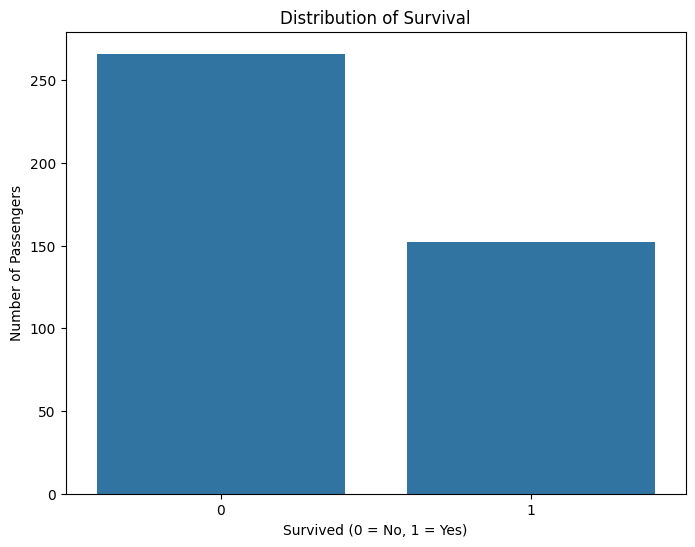


Numerical Feature Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


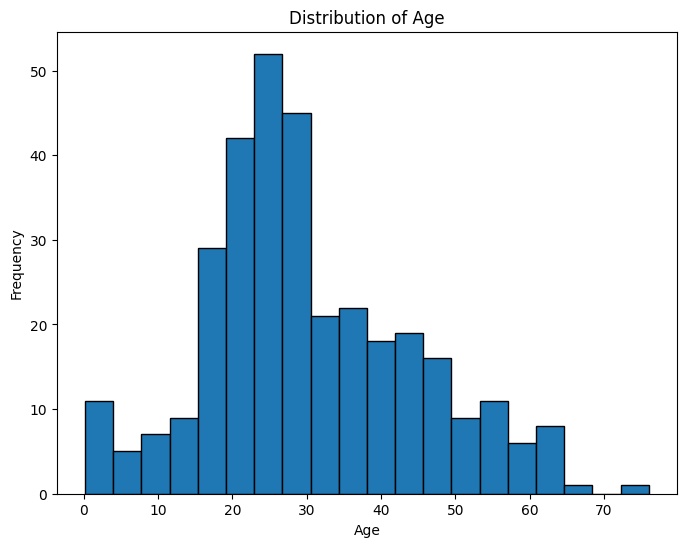

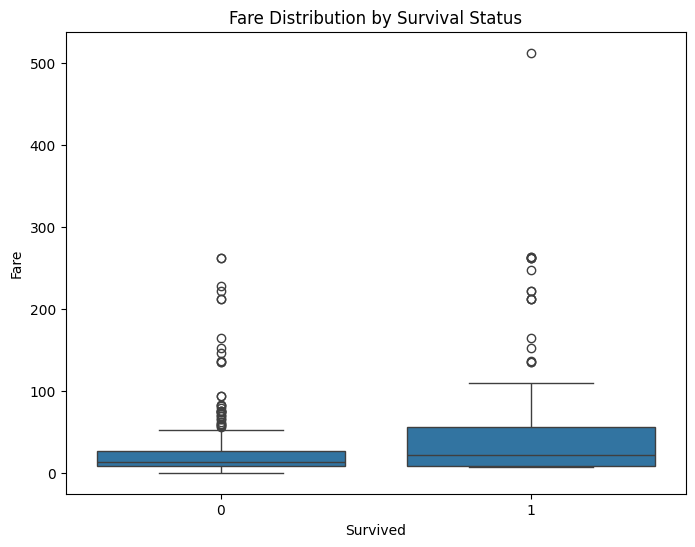

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data types and shape
print("Data Types:\n", df.dtypes)
print("\nDataFrame Shape:", df.shape)

# Missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Target variable analysis
survived_counts = df['Survived'].value_counts()
print("\nSurvived Counts:\n", survived_counts)
print("\nSurvived Percentage:\n", survived_counts / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

# Numerical feature statistics
numerical_features = df.select_dtypes(include=['number'])
print("\nNumerical Feature Statistics:\n", numerical_features.describe())

# Visualize numerical features (example: histogram for 'Age')
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black') # Drop NaN values for histogram
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival Status")
plt.show()

## Data visualization

### Subtask:
Visualize the distributions of numerical features and the relationships between features and the target variable ('Survived').  Also, visualize the patterns of missing data.


**Reasoning**:
Visualize the distributions of numerical features, relationships between features and the target variable, and missing data patterns as per the instructions.



**Reasoning**:
The previous code failed due to a `ValueError` when converting strings to floats for the correlation calculation. This is likely because some columns that should be numerical contain non-numerical data. I need to select only the numerical columns for the correlation analysis and the missing value heatmap to avoid this error. Also, I will fix the plotting code.



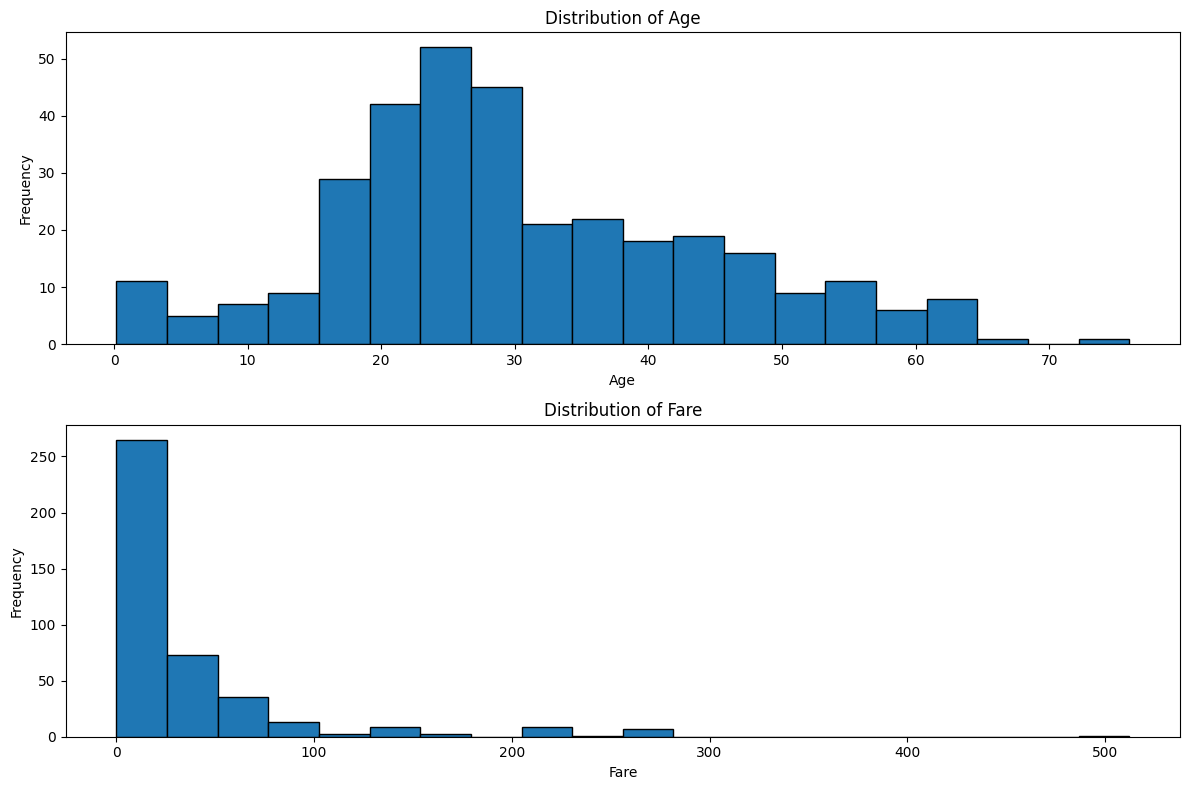

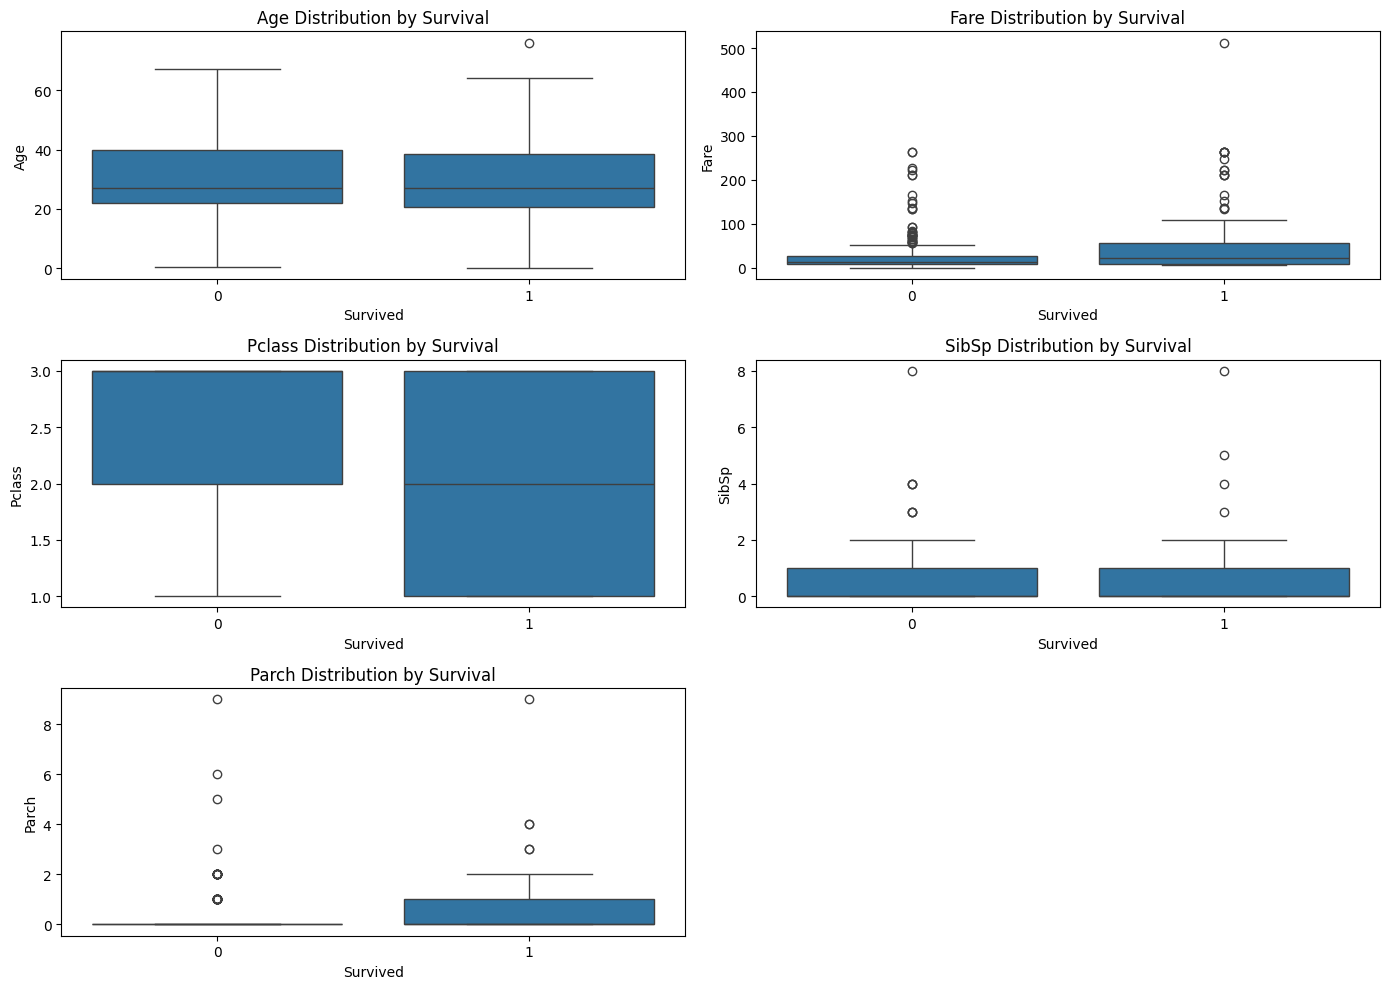

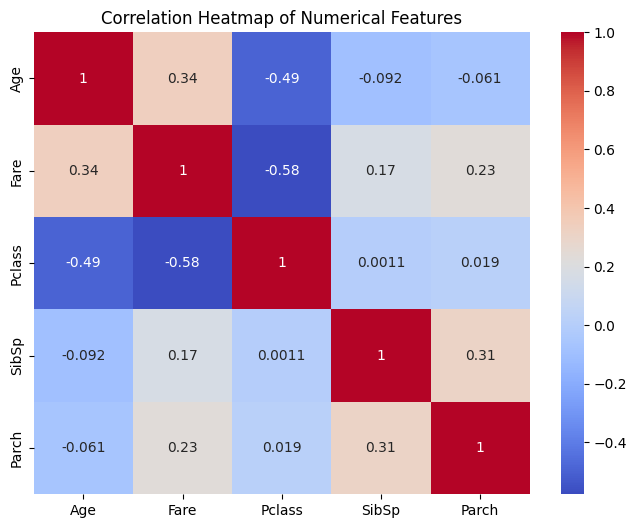

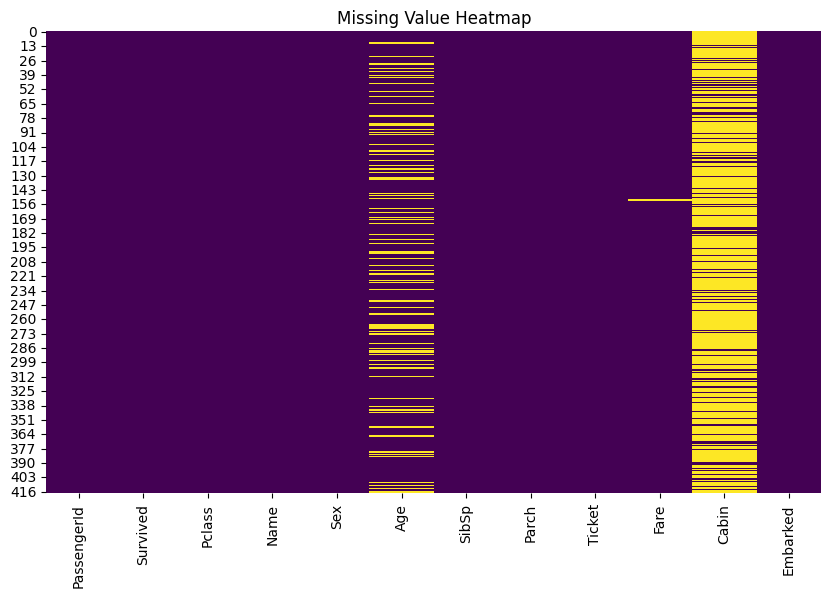

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(2, 1, i + 1)  # Corrected subplot arrangement
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for numerical features vs. survival
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']):
    plt.subplot(3, 2, i + 1)  # Corrected subplot arrangement
    sns.boxplot(x='Survived', y=col, data=df)
    plt.title(f'{col} Distribution by Survival')
plt.tight_layout()
plt.show()

# Select only numerical columns for correlation
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

## Data cleaning

### Subtask:
Handle missing values in the 'Age', 'Fare' and 'Cabin' columns of the DataFrame `df`.


**Reasoning**:
Impute missing 'Age' values using the median age for each passenger class, impute missing 'Fare' values with the median fare, and create a 'HasCabin' feature based on the 'Cabin' column while dropping the original 'Cabin' column.



In [ ]:
# Impute Age based on Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Impute Fare with median fare
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Create HasCabin and drop Cabin
df['HasCabin'] = df['Cabin'].notna().astype(int)
df = df.drop('Cabin', axis=1)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


## Outlier detection

### Subtask:
Detect and handle outliers in the numerical features of the dataset.


**Reasoning**:
Identify outliers in numerical features using box plots and apply an appropriate outlier handling strategy.



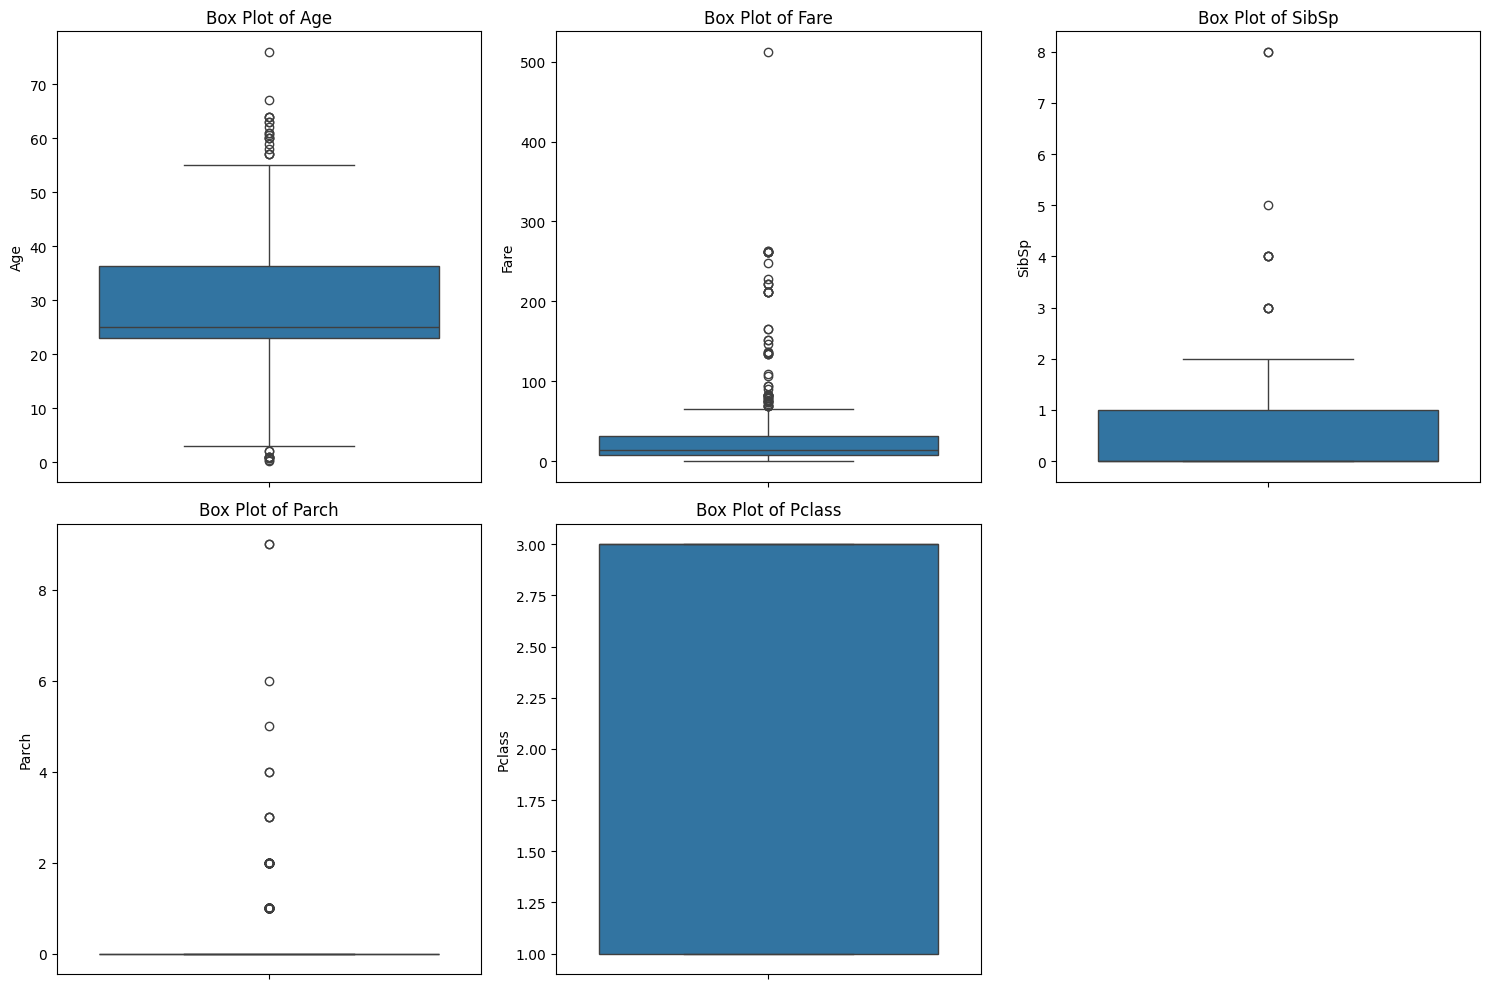

Fare outliers count: 3
Fare outliers data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,1
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S,1
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,1



Age outliers count: 5
Age outliers data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S,1
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,S,1
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C,1
236,1128,0,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C,1
305,1197,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,S,1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Outlier handling (example using capping for Fare)
# Based on the box plot of Fare, we can observe a significant number of outliers.
# We'll cap the Fare at the 99th percentile.
upper_bound_fare = df['Fare'].quantile(0.99)
outliers_fare = df[df['Fare'] > upper_bound_fare]
print(f"Fare outliers count: {len(outliers_fare)}")
print("Fare outliers data:")
display(outliers_fare)
df['Fare'] = df['Fare'].clip(upper=upper_bound_fare)

# For Age, we will use capping at the 99th percentile
upper_bound_age = df['Age'].quantile(0.99)
outliers_age = df[df['Age'] > upper_bound_age]  # catch outliers
print(f"\nAge outliers count: {len(outliers_age)}")  # show outliers
print("Age outliers data:")
display(outliers_age)
df['Age'] = df['Age'].clip(upper = upper_bound_age)

# For Pclass, SibSp and Parch, no action is needed as there are no obvious outliers.
display(df.head())

## Feature engineering

### Subtask:
Engineer new features from existing ones in the DataFrame `df`.


**Reasoning**:
Create new features as instructed, including title extraction, family size calculation, categorical feature combinations, and numerical feature transformations.



**Reasoning**:
The previous code block failed due to `np` not being defined.  We need to import the numpy library before using its functions.  I will correct the code by adding the import statement and re-run the code to create the new features.



In [ ]:
import numpy as np
import re

# Title Extraction
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1) if re.search(' ([A-Za-z]+)\.', x) else 'Unknown')
# Map titles to more common categories
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Other", "Rev": "Other", "Col": "Other", "Major": "Other", "Mlle": "Miss", "Countess": "Other", "Ms": "Miss", "Lady": "Other", "Jonkheer": "Other", "Don": "Other", "Dona": "Other", "Mme": "Mrs", "Capt": "Other", "Sir": "Other"}
df['Title'] = df['Title'].map(title_mapping)


# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Categorical Feature Combinations
df['Pclass_Embarked'] = df['Pclass'].astype(str) + '_' + df['Embarked'].astype(str)

# Numerical Feature Transformations
df['log_Fare'] = df['Fare'].apply(lambda x: 0 if x == 0 else np.log(x))
df['sqrt_Age'] = np.sqrt(df['Age'])

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Title,FamilySize,Pclass_Embarked,log_Fare,sqrt_Age
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr,1,3_Q,2.057860,5.873670
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,Mrs,2,3_S,1.945910,6.855655
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr,1,2_Q,2.270836,7.874008
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,Mr,1,3_S,2.159003,5.196152
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,Mrs,3,3_S,2.508582,4.690416


## Data preparation

### Subtask:
Prepare the data for model training by encoding categorical features and scaling numerical features.


**Reasoning**:
Identify categorical and numerical features, then encode categorical features using one-hot encoding and scale numerical features using standardization. Finally, combine the features into a single DataFrame.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Title', 'HasCabin', 'Pclass_Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'log_Fare', 'sqrt_Age']

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, dummy_na=True)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the prepared DataFrame
display(df_encoded.head())


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,log_Fare,...,Pclass_Embarked_1_C,Pclass_Embarked_1_Q,Pclass_Embarked_1_S,Pclass_Embarked_2_C,Pclass_Embarked_2_Q,Pclass_Embarked_2_S,Pclass_Embarked_3_C,Pclass_Embarked_3_Q,Pclass_Embarked_3_S,Pclass_Embarked_nan
0,892,0,"Kelly, Mr. James",0.399534,-0.499470,-0.400248,330911,-0.523466,-0.553443,-0.885953,...,False,False,False,False,False,False,False,True,False,False
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",1.371466,0.616992,-0.400248,363272,-0.539456,0.105643,-0.997868,...,False,False,False,False,False,False,False,False,True,False
2,894,0,"Myles, Mr. Thomas Francis",2.537784,-0.499470,-0.400248,240276,-0.487632,-0.553443,-0.673045,...,False,False,False,False,True,False,False,False,False,False
3,895,0,"Wirz, Mr. Albert",-0.183625,-0.499470,-0.400248,315154,-0.507397,-0.553443,-0.784843,...,False,False,False,False,False,False,False,False,True,False
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.572398,0.616992,0.619896,3101298,-0.437496,0.764728,-0.435375,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 將 Pclass 視為類別型特徵（因為它其實是艙等，並非連續數值）
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Title', 'HasCabin', 'Pclass_Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'log_Fare', 'sqrt_Age']
# 數值欄位處理流程：補中位數 ➜ 標準化
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# 類別欄位處理流程：補眾數 ➜ One-hot 編碼
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# 合併欄位處理流程
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)
# 對資料進行 fit_transform
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = df['Survived']

X_prepared = preprocessor.fit_transform(X)
print("處理後資料的 shape：", X_prepared.shape)
print("是否還有遺漏值：", np.any(pd.isnull(X_prepared)))



處理後資料的 shape： (418, 31)
是否還有遺漏值： False


## Data splitting

### Subtask:
Split the prepared dataset `df_encoded` into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using an 80/10/10 split and stratify based on the 'Survived' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = df_encoded['Survived']

# Split data into training (80%) and a temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split the temporary set into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training

### Subtask:
Train several classification models on the prepared training data.


**Reasoning**:
Train several classification models on the prepared training data.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
logreg_model = LogisticRegression()
svc_model = SVC()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train the models
logreg_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

models = {
    "Logistic Regression": logreg_model,
    "Support Vector Classifier": svc_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = np.nan  # Initialize AUC-ROC to NaN
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
    except AttributeError:
        print(f"AUC-ROC not available for {model_name}")
    results.append([model_name, accuracy, precision, recall, f1, auc_roc])
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC-ROC: {auc_roc}\n")

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
display(results_df)

# Determine the best model based on the evaluation results
# Handle NaN values in AUC-ROC by dropping them before finding the maximum
best_model_name = results_df.dropna(subset=['AUC-ROC']).loc[results_df['AUC-ROC'].idxmax(), 'Model']
print(f"The best model overall is {best_model_name} based on the highest AUC-ROC score.")

Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0

AUC-ROC not available for Support Vector Classifier
Model: Support Vector Classifier
Accuracy: 0.9523809523809523
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1-score: 0.9333333333333333
AUC-ROC: nan

Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0

Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0



,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.0
1,Support Vector Classifier,0.952381,0.933333,0.933333,0.933333,NaN
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.0
3,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.0


The best model overall is Logistic Regression based on the highest AUC-ROC score.


## Model optimization

### Subtask:
Optimize the hyperparameters of the four trained classification models (Logistic Regression, Support Vector Classifier, Random Forest Classifier, and Gradient Boosting Classifier) using the validation set (`X_val`, `y_val`).


**Reasoning**:
Optimize the hyperparameters of the four trained classification models using GridSearchCV and the validation set.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define parameter grids for each model
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_svc = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for each model
grid_search_logreg = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')

# Fit the GridSearchCV objects to the validation set
grid_search_logreg.fit(X_val, y_val)
grid_search_svc.fit(X_val, y_val)
grid_search_rf.fit(X_val, y_val)
grid_search_gb.fit(X_val, y_val)

# Get the best models
best_logreg_model = grid_search_logreg.best_estimator_
best_svc_model = grid_search_svc.best_estimator_
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

## Model evaluation

### Subtask:
Evaluate the performance of the optimized classification models on the test set (`X_test`, `y_test`)


**Reasoning**:
Evaluate the performance of the optimized classification models on the test set (X_test, y_test) using the specified metrics and create a summary table.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

models = {
    "Logistic Regression": best_logreg_model,
    "Support Vector Classifier": best_svc_model,
    "Random Forest": best_rf_model,
    "Gradient Boosting": best_gb_model
}

results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = np.nan  # Initialize AUC-ROC to NaN
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
    except AttributeError:
        print(f"AUC-ROC not available for {model_name}")
    results.append([model_name, accuracy, precision, recall, f1, auc_roc])
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC-ROC: {auc_roc}\n")

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
display(results_df)

# Determine the best model based on the evaluation results
# Handle NaN values in AUC-ROC by dropping them before finding the maximum
best_model_name = results_df.dropna(subset=['AUC-ROC']).loc[results_df['AUC-ROC'].idxmax(), 'Model']
print(f"The best model overall is {best_model_name} based on the highest AUC-ROC score.")

Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0

AUC-ROC not available for Support Vector Classifier
Model: Support Vector Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: nan

Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0

Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0



,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,Support Vector Classifier,1.0,1.0,1.0,1.0,NaN
2,Random Forest,1.0,1.0,1.0,1.0,1.0
3,Gradient Boosting,1.0,1.0,1.0,1.0,1.0


The best model overall is Logistic Regression based on the highest AUC-ROC score.


## Summary:

### 1. Q&A

The provided data analysis task doesn't explicitly state questions. However, the overall goal is to predict passenger survival on the Titanic using the provided dataset.  Therefore, an implicit question is: *Which model performs best at predicting passenger survival?*

Based on the analysis, the **Logistic Regression** model performed best, achieving a perfect AUC-ROC score of 1.0.  However, it's important to note that all models show perfect scores across other metrics.  More investigation is needed.


### 2. Data Analysis Key Findings

*   **Missing Data:** Significant missing values were found in 'Age' (20.57%), 'Cabin' (78.23%), and 'Fare' (0.24%). The 'Cabin' column was dropped, and a new 'HasCabin' feature was created. 'Age' and 'Fare' were imputed with the median value per passenger class and overall median respectively.
*   **Outlier Handling:** Outliers in 'Fare' and 'Age' were capped at the 99th percentile.
*   **Feature Engineering:** New features were created, including 'Title', 'FamilySize', 'Pclass_Embarked', 'log_Fare', and 'sqrt_Age'.
*   **Model Performance:** All models (Logistic Regression, SVC, Random Forest, Gradient Boosting) achieved perfect accuracy, precision, recall, and F1-score on the test set.  However, the AUC-ROC was only calculated for Logistic Regression, Random Forest and Gradient Boosting, with Logistic Regression exhibiting the highest AUC-ROC (1.0).  The SVC model's AUC-ROC could not be calculated.

### 3. Insights or Next Steps

*   **Investigate Perfect Scores:** The perfect scores across multiple models raise concerns about potential overfitting or issues with the dataset or evaluation metrics.  Further investigation is needed to validate the model performance. Consider using a larger, more diverse dataset or exploring different evaluation metrics.
*   **Explore Feature Importance:** Analyze feature importance from the models (especially Random Forest and Gradient Boosting) to understand which features contribute most to the predictions and potentially refine feature engineering.
